In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import Normalizer, OneHotEncoder
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None

In [113]:
cd C:\Users\Dubun\IronHack\Other\jupyter_notebook

C:\Users\Dubun\IronHack\Other\jupyter_notebook


In [114]:
data=pd.read_csv('fifa21_male2.csv')
data

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,Flag Photo,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [115]:
#first, let's do some data cleaning operations such as:
#stardize columns
data.columns = [column.lower().replace(' ', '_') for column in data.columns]

In [116]:
data.columns

Index(['id', 'name', 'age', 'ova', 'nationality', 'club', 'bov', 'bp',
       'position', 'player_photo',
       ...
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk', 'gender'],
      dtype='object', length=107)

In [117]:
#dropping columns that are redundant or not useful to my analysis
df = data.drop(['player_photo','club_logo','flag_photo','team_&_contract','position','ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm','cdm', 'rdm','rwb','lb','lcb','cb','rcb','rb','gk'], axis=1)

In [118]:
df.columns

Index(['id', 'name', 'age', 'ova', 'nationality', 'club', 'bov', 'bp', 'pot',
       'height', 'weight', 'foot', 'growth', 'joined', 'loan_date_end',
       'value', 'wage', 'release_clause', 'contract', 'attacking', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'skill',
       'dribbling', 'curve', 'fk_accuracy', 'long_passing', 'ball_control',
       'movement', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'power', 'shot_power', 'jumping', 'stamina', 'strength',
       'long_shots', 'mentality', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'composure', 'defending', 'marking',
       'standing_tackle', 'sliding_tackle', 'goalkeeping', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes',
       'total_stats', 'base_stats', 'w/f', 'sm', 'a/w', 'd/w', 'ir', 'pac',
       'sho', 'pas', 'dri', 'def', 'phy', 'hits', 'gender'],
      dtype='object')

In [119]:
#dealing with special characters in the cells
df['wage'] = df['wage'].str.replace('€', '')
df['value'] = df['value'].str.replace('€', '')
df['release_clause'] = df['release_clause'].str.replace('€', '')
df.head()

,id,name,age,ova,nationality,club,bov,bp,pot,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,69,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,625K,7K,0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,71,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,600K,7K,1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,71,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,1.1M,15K,0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,82,"5'11""",165lbs,Right,14,NaN,NaN,0,0,0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,81,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,5.5M,12K,7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,Male


In [120]:
#defining a function to remove K and M
def currency_cleaner(x):
    if "K" in str(x):
        x = str(x).replace("K","")
        x = float(x) * 1000
    elif "M" in str(x):
        x = str(x).replace("M","")
        x = float(x) * 1000000
    return float(x)

#applying that function to columns wage, value and release_clause
df['wage'] = df['wage'].apply(currency_cleaner)
df['value'] = df['value'].apply(currency_cleaner)
df['release_clause'] = df['release_clause'].apply(currency_cleaner)

#converting these 3 str columns to float
df['wage'] = df['wage'].astype(float)
df['value'] = df['value'].astype(float)
df['release_clause'] = df['release_clause'].astype(float)
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Data columns (total 75 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                17125 non-null  int64  
 1   name              17125 non-null  object 
 2   age               17125 non-null  int64  
 3   ova               17125 non-null  int64  
 4   nationality       17125 non-null  object 
 5   club              17102 non-null  object 
 6   bov               17125 non-null  int64  
 7   bp                17125 non-null  object 
 8   pot               17125 non-null  int64  
 9   height            17125 non-null  object 
 10  weight            17125 non-null  object 
 11  foot              17125 non-null  object 
 12  growth            17125 non-null  int64  
 13  joined            17067 non-null  object 
 14  loan_date_end     910 non-null    object 
 15  value             17125 non-null  float64
 16  wage              17125 non-null  float6

In [121]:
# id is the id, unique, so I passed it as the index
df = df.set_index('id')
df.head()

,name,age,ova,nationality,club,bov,bp,pot,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,gender
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,G. Pasquale,33,69,Italy,Udinese,71,LWB,69,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,625000.0,7000.0,0.0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,Male
16,Luis García,37,71,Spain,KAS Eupen,70,CM,71,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,600000.0,7000.0,1100000.0,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,Male
27,J. Cole,33,71,England,Coventry City,71,CAM,71,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,1100000.0,15000.0,0.0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,Male
36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,82,"5'11""",165lbs,Right,14,NaN,NaN,0.0,0.0,0.0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,Male
41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,81,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,5500000.0,12000.0,7200000.0,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,Male


In [122]:
#now let's deal with special characters in the height column, convert it to flat and to cm
df['height'] = df["height"] = df["height"].str.replace('"',"")
df['height'] = df['height'].apply(lambda x: int(x.split("'")[0])*30.48 + int(x.split("'")[1])*2.54)
df.head()

,name,age,ova,nationality,club,bov,bp,pot,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,gender
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,G. Pasquale,33,69,Italy,Udinese,71,LWB,69,182.88,181lbs,Left,0,"Jul 1, 2008",NaN,625000.0,7000.0,0.0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,Male
16,Luis García,37,71,Spain,KAS Eupen,70,CM,71,177.80,143lbs,Right,0,"Jul 19, 2014",NaN,600000.0,7000.0,1100000.0,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,Male
27,J. Cole,33,71,England,Coventry City,71,CAM,71,175.26,161lbs,Right,0,"Jan 7, 2016",NaN,1100000.0,15000.0,0.0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,Male
36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,82,180.34,165lbs,Right,14,NaN,NaN,0.0,0.0,0.0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,Male
41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,81,170.18,150lbs,Right,0,"Jul 16, 2018",NaN,5500000.0,12000.0,7200000.0,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,Male


In [123]:
#let's create a function that converts pounds to kg - useless as I will drop that variable later on
def weight_converter(x):
    if 'lbs' in str(x):
        x = str(x).replace('lbs',"")
        x = float(x) * 0.4535
    return float(x)
df['weight'] = df['weight'].apply(weight_converter)
df.head()

,name,age,ova,nationality,club,bov,bp,pot,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,gender
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,G. Pasquale,33,69,Italy,Udinese,71,LWB,69,182.88,82.0835,Left,0,"Jul 1, 2008",NaN,625000.0,7000.0,0.0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,Male
16,Luis García,37,71,Spain,KAS Eupen,70,CM,71,177.80,64.8505,Right,0,"Jul 19, 2014",NaN,600000.0,7000.0,1100000.0,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,Male
27,J. Cole,33,71,England,Coventry City,71,CAM,71,175.26,73.0135,Right,0,"Jan 7, 2016",NaN,1100000.0,15000.0,0.0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,Male
36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,82,180.34,74.8275,Right,14,NaN,NaN,0.0,0.0,0.0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,Male
41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,81,170.18,68.0250,Right,0,"Jul 16, 2018",NaN,5500000.0,12000.0,7200000.0,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,Male


In [124]:
df['hits'] = df['hits'].apply(currency_cleaner) #replacing K by *1000 in hits column
df['hits'] = df['hits'].astype(float) #converting it to float
df.head()

,name,age,ova,nationality,club,bov,bp,pot,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,gender
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,G. Pasquale,33,69,Italy,Udinese,71,LWB,69,182.88,82.0835,Left,0,"Jul 1, 2008",NaN,625000.0,7000.0,0.0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4.0,Male
16,Luis García,37,71,Spain,KAS Eupen,70,CM,71,177.80,64.8505,Right,0,"Jul 19, 2014",NaN,600000.0,7000.0,1100000.0,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4.0,Male
27,J. Cole,33,71,England,Coventry City,71,CAM,71,175.26,73.0135,Right,0,"Jan 7, 2016",NaN,1100000.0,15000.0,0.0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11.0,Male
36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,82,180.34,74.8275,Right,14,NaN,NaN,0.0,0.0,0.0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3.0,Male
41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,81,170.18,68.0250,Right,0,"Jul 16, 2018",NaN,5500000.0,12000.0,7200000.0,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149.0,Male


In [125]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17125 entries, 2 to 259105
Data columns (total 74 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              17125 non-null  object 
 1   age               17125 non-null  int64  
 2   ova               17125 non-null  int64  
 3   nationality       17125 non-null  object 
 4   club              17102 non-null  object 
 5   bov               17125 non-null  int64  
 6   bp                17125 non-null  object 
 7   pot               17125 non-null  int64  
 8   height            17125 non-null  float64
 9   weight            17125 non-null  float64
 10  foot              17125 non-null  object 
 11  growth            17125 non-null  int64  
 12  joined            17067 non-null  object 
 13  loan_date_end     910 non-null    object 
 14  value             17125 non-null  float64
 15  wage              17125 non-null  float64
 16  release_clause    17125 non-null  float

In [126]:
df['w/f'] = df['w/f'].str.replace('★', '') #removing★  -- this cell is useless as I am dropping these variables later on
df['sm'] = df['sm'].str.replace('★', '')
df['ir'] = df['ir'].str.replace('★', '')
df['w/f'] = df['w/f'].astype(float)
df['sm'] = df['sm'].astype(float)
df['ir'] = df['ir'].astype(float)
df.head(1)

,name,age,ova,nationality,club,bov,bp,pot,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,gender
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,G. Pasquale,33,69,Italy,Udinese,71,LWB,69,182.88,82.0835,Left,0,"Jul 1, 2008",NaN,625000.0,7000.0,0.0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3.0,2.0,Medium,High,2.0,71,59,70,71,68,69,4.0,Male


In [127]:
#let's split the contract column into two columns: contract_start and contract_end - then remove contract column
new = df["contract"].str.split(" ~ ", n = 1, expand = True)
df["contract_start"]= new[0]
df["contract_end"]= new[1]
df.drop(columns =["contract"], inplace = True)
df.head()

,name,age,ova,nationality,club,bov,bp,pot,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,gender,contract_start,contract_end
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,G. Pasquale,33,69,Italy,Udinese,71,LWB,69,182.88,82.0835,Left,0,"Jul 1, 2008",NaN,625000.0,7000.0,0.0,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3.0,2.0,Medium,High,2.0,71,59,70,71,68,69,4.0,Male,2008,2016
16,Luis García,37,71,Spain,KAS Eupen,70,CM,71,177.80,64.8505,Right,0,"Jul 19, 2014",NaN,600000.0,7000.0,1100000.0,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4.0,3.0,Medium,Medium,1.0,53,69,73,69,58,63,4.0,Male,2014,2019
27,J. Cole,33,71,England,Coventry City,71,CAM,71,175.26,73.0135,Right,0,"Jan 7, 2016",NaN,1100000.0,15000.0,0.0,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4.0,4.0,Medium,Low,2.0,45,68,76,77,36,52,11.0,Male,2016,2020
36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,82,180.34,74.8275,Right,14,NaN,NaN,0.0,0.0,0.0,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3.0,1.0,NaN,NaN,1.0,61,66,66,69,47,60,3.0,Male,2009,None
41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,81,170.18,68.0250,Right,0,"Jul 16, 2018",NaN,5500000.0,12000.0,7200000.0,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4.0,4.0,High,Medium,4.0,58,70,85,85,63,59,149.0,Male,2018,2021


In [128]:
pd.to_datetime(df.contract_end, format='%Y') #converting contract_end to datetime format

id
2        2016-01-01
16       2019-01-01
27       2020-01-01
36              NaT
41       2021-01-01
            ...    
259088          NaT
259090   2021-01-01
259091   2022-01-01
259101   2023-01-01
259105   2024-01-01
Name: contract_end, Length: 17125, dtype: datetime64[ns]

In [129]:
df

,name,age,ova,nationality,club,bov,bp,pot,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,gender,contract_start,contract_end
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,G. Pasquale,33,69,Italy,Udinese,71,LWB,69,182.88,82.0835,Left,0,"Jul 1, 2008",NaN,625000.0,7000.0,0.0,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3.0,2.0,Medium,High,2.0,71,59,70,71,68,69,4.0,Male,2008,2016
16,Luis García,37,71,Spain,KAS Eupen,70,CM,71,177.80,64.8505,Right,0,"Jul 19, 2014",NaN,600000.0,7000.0,1100000.0,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4.0,3.0,Medium,Medium,1.0,53,69,73,69,58,63,4.0,Male,2014,2019
27,J. Cole,33,71,England,Coventry City,71,CAM,71,175.26,73.0135,Right,0,"Jan 7, 2016",NaN,1100000.0,15000.0,0.0,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4.0,4.0,Medium,Low,2.0,45,68,76,77,36,52,11.0,Male,2016,2020
36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,82,180.34,74.8275,Right,14,NaN,NaN,0.0,0.0,0.0,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3.0,1.0,NaN,NaN,1.0,61,66,66,69,47,60,3.0,Male,2009,None
41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,81,170.18,68.0250,Right,0,"Jul 16, 2018",NaN,5500000.0,12000.0,7200000.0,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4.0,4.0,High,Medium,4.0,58,70,85,85,63,59,149.0,Male,2018,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259088,A. Medioub,22,64,France,CD Tondela,66,CB,69,198.12,74.8275,Right,5,"Sep 29, 2020","Jun 30, 2021",550000.0,2000.0,0.0,197,35,23,66,47,26.0,193,44,26.0,33,34,56,243,52,55,46.0,48,42.0,279,48,70.0,59,74,28,218,69,58.0,23.0,29.0,39,46.0,198,61,71,66.0,39,11,8,8,5,7,1367,302,2.0,2.0,Medium,Medium,1.0,54,30,37,48,64,69,5.0,Male,"Jun 30, 2021 On Loan",None
259090,W. Rickard,18,56,Wales,Burnley,58,CAM,66,177.80,77.0950,Right,10,"Aug 20, 2020",NaN,130000.0,3000.0,273000.0,248,50,43,50,64,41.0,264,57,42.0,50,61,54,298,61,63,52.0,54,68.0,271,51,62.0,53,57,48,259,51,50.0,55.0,53.0,50,46.0,132,34,42,56.0,57,12,15,7,12,11,1529,319,3.0,2.0,Medium,Medium,1.0,62,46,57,56,43,55,5.0,Male,2020,2021
259091,C. Barrett,18,56,England,Burnley,56,RB,67,175.26,69.8390,Right,11,"Aug 20, 2020",NaN,130000.0,2000.0,273000.0,218,55,34,53,42,34.0,212,52,43.0,34,36,47,308,66,61,54.0,59,68.0,233,28,61.0,53,54,37,256,58,55.0,49.0,45.0,49,43.0,163,55,54,54.0,40,8,7,5,12,8,1430,303,3.0,2.0,Medium,Medium,1.0,63,35,44,52,54,55,3.0,Male,2020,2022


In [131]:
df.contract_start.unique()

array(['2008', '2014', '2016', '2009', '2018', '2011', '2019', '1990',
       '1991', '1993', '2005', 'England Free', '2010', '2015', 'Free',
       '1995', '2012', '2007', '2001', 'France Free', '2020', '2002',
       '2013', '2006', '2017', '1996', '2004', 'Australia Free', '1998',
       '1999', 'Czech Republic Free', 'United States Free', '1992',
       'Ivory Coast Free', 'Bari Jun 30, 2018 On Loan',
       'Norwich City 2012', 'Jun 30, 2014 On Loan',
       'Jun 30, 2018 On Loan', '2003', 'Jun 30, 2021 On Loan', '2000',
       'FC Porto 2019', 'Germany Free', 'Brazil Free',
       'Jun 30, 2015 On Loan', 'Club América 2019', 'U.N.A.M. 2003',
       'Deportivo Cali 2012', 'May 31, 2021 On Loan', 'DR Congo Free',
       'Jun 30, 2019 On Loan', 'May 31, 2018 On Loan', 'U.N.A.M. 2020',
       'Vissel Kobe 2019', 'May 31, 2019 On Loan', 'Jun 30, 2017 On Loan',
       'FC Red Bull Salzburg 2009', 'Argentina Free',
       'CD Mirandés Jun 30, 2017 On Loan', 'SL Benfica 2020',
       'De

In [132]:
#I do believe that the market for loan players and free players is really different than the ones for "under contract" players.
#for that reason, I decided to drop rows where there is a value in "loan_date_end" and the word "loan" appears in contract_start column
df = df[df['loan_date_end'].isna()]
df.head()

,name,age,ova,nationality,club,bov,bp,pot,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,gender,contract_start,contract_end
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,G. Pasquale,33,69,Italy,Udinese,71,LWB,69,182.88,82.0835,Left,0,"Jul 1, 2008",NaN,625000.0,7000.0,0.0,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3.0,2.0,Medium,High,2.0,71,59,70,71,68,69,4.0,Male,2008,2016
16,Luis García,37,71,Spain,KAS Eupen,70,CM,71,177.80,64.8505,Right,0,"Jul 19, 2014",NaN,600000.0,7000.0,1100000.0,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4.0,3.0,Medium,Medium,1.0,53,69,73,69,58,63,4.0,Male,2014,2019
27,J. Cole,33,71,England,Coventry City,71,CAM,71,175.26,73.0135,Right,0,"Jan 7, 2016",NaN,1100000.0,15000.0,0.0,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4.0,4.0,Medium,Low,2.0,45,68,76,77,36,52,11.0,Male,2016,2020
36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,82,180.34,74.8275,Right,14,NaN,NaN,0.0,0.0,0.0,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3.0,1.0,NaN,NaN,1.0,61,66,66,69,47,60,3.0,Male,2009,None
41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,81,170.18,68.0250,Right,0,"Jul 16, 2018",NaN,5500000.0,12000.0,7200000.0,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4.0,4.0,High,Medium,4.0,58,70,85,85,63,59,149.0,Male,2018,2021


In [133]:
#after checking the above entry, we can see so many strings. I decided to create a dfd that just drop rows where contract_start occurs less than 20 times
df_drop = df.contract_start.value_counts()
dfd = df[df.contract_start.isin(df_drop.index[df_drop.gt(20)])]
dfd
#as per below table, we can see that we have still 16720 rows, which is more than 97% of df1 total rows.

,name,age,ova,nationality,club,bov,bp,pot,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,gender,contract_start,contract_end
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,G. Pasquale,33,69,Italy,Udinese,71,LWB,69,182.88,82.0835,Left,0,"Jul 1, 2008",NaN,625000.0,7000.0,0.0,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3.0,2.0,Medium,High,2.0,71,59,70,71,68,69,4.0,Male,2008,2016
16,Luis García,37,71,Spain,KAS Eupen,70,CM,71,177.80,64.8505,Right,0,"Jul 19, 2014",NaN,600000.0,7000.0,1100000.0,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4.0,3.0,Medium,Medium,1.0,53,69,73,69,58,63,4.0,Male,2014,2019
27,J. Cole,33,71,England,Coventry City,71,CAM,71,175.26,73.0135,Right,0,"Jan 7, 2016",NaN,1100000.0,15000.0,0.0,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4.0,4.0,Medium,Low,2.0,45,68,76,77,36,52,11.0,Male,2016,2020
36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,82,180.34,74.8275,Right,14,NaN,NaN,0.0,0.0,0.0,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3.0,1.0,NaN,NaN,1.0,61,66,66,69,47,60,3.0,Male,2009,None
41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,81,170.18,68.0250,Right,0,"Jul 16, 2018",NaN,5500000.0,12000.0,7200000.0,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4.0,4.0,High,Medium,4.0,58,70,85,85,63,59,149.0,Male,2018,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259085,F. Tapia,19,60,Mexico,Club América,60,GK,72,185.42,78.9090,Right,12,"Jul 1, 2020",NaN,300000.0,2000.0,570000.0,67,12,8,16,23,8.0,78,9,11.0,15,29,14,173,22,26,30.0,45,50.0,197,45,60.0,30,55,7,122,21,7.0,6.0,55.0,33,40.0,81,50,15,16.0,305,60,61,60,59,65,1023,329,2.0,1.0,Medium,Medium,1.0,60,61,60,65,24,59,9.0,Male,2020,2022
259090,W. Rickard,18,56,Wales,Burnley,58,CAM,66,177.80,77.0950,Right,10,"Aug 20, 2020",NaN,130000.0,3000.0,273000.0,248,50,43,50,64,41.0,264,57,42.0,50,61,54,298,61,63,52.0,54,68.0,271,51,62.0,53,57,48,259,51,50.0,55.0,53.0,50,46.0,132,34,42,56.0,57,12,15,7,12,11,1529,319,3.0,2.0,Medium,Medium,1.0,62,46,57,56,43,55,5.0,Male,2020,2021
259091,C. Barrett,18,56,England,Burnley,56,RB,67,175.26,69.8390,Right,11,"Aug 20, 2020",NaN,130000.0,2000.0,273000.0,218,55,34,53,42,34.0,212,52,43.0,34,36,47,308,66,61,54.0,59,68.0,233,28,61.0,53,54,37,256,58,55.0,49.0,45.0,49,43.0,163,55,54,54.0,40,8,7,5,12,8,1430,303,3.0,2.0,Medium,Medium,1.0,63,35,44,52,54,55,3.0,Male,2020,2022


In [136]:
dfd.contract_start.unique() #we can see now that all "on loan" players are removed. 
#let's now remove the free players, since we would need another model to check their market value
dfd=dfd[dfd['contract_start']!='Free']
dfd.shape

(15645, 75)

In [137]:
dfd.contract_start.unique()

array(['2008', '2014', '2016', '2009', '2018', '2011', '2019', '2005',
       '2010', '2015', '2012', '2007', '2020', '2013', '2017'],
      dtype=object)

In [138]:
dfd.gender.value_counts()

Male    15645
Name: gender, dtype: int64

In [139]:
#Now that I cleaned all what I mentioned before, we can see that we have 15 645 rows remaining out of the 17 125 at begining. 
#This means that until now, I dropped 8.6% of the original data

In [140]:
#In order for my model not to be too heavy, I will drop other columns that I think have no/very little impact on market value of a player
dfd=dfd.drop(['club','weight','bov','foot','joined','loan_date_end','crossing','finishing','heading_accuracy','short_passing','volleys','dribbling','curve','fk_accuracy','long_passing','ball_control','acceleration','sprint_speed','agility','reactions','balance','shot_power','jumping','stamina','strength','long_shots','aggression','interceptions','positioning','vision','penalties','composure','marking','standing_tackle','sliding_tackle','gk_diving','gk_handling','gk_kicking','gk_positioning','gk_reflexes','w/f','sm','a/w','d/w','gender','contract_start'], axis=1)

In [141]:
dfd.head()

,name,age,ova,nationality,bp,pot,height,growth,value,wage,release_clause,attacking,skill,movement,power,mentality,defending,goalkeeping,total_stats,base_stats,ir,pac,sho,pas,dri,def,phy,hits,contract_end
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,G. Pasquale,33,69,Italy,LWB,69,182.88,0,625000.0,7000.0,0.0,313,338,347,347,320,208,56,1929,408,2.0,71,59,70,71,68,69,4.0,2016
16,Luis García,37,71,Spain,CM,71,177.80,0,600000.0,7000.0,1100000.0,337,369,305,324,362,153,56,1906,385,1.0,53,69,73,69,58,63,4.0,2019
27,J. Cole,33,71,England,CAM,71,175.26,0,1100000.0,15000.0,0.0,337,387,295,284,317,99,51,1770,354,2.0,45,68,76,77,36,52,11.0,2020
36,D. Yorke,36,68,Trinidad &amp; Tobago,ST,82,180.34,14,0.0,0.0,0.0,264,255,176,239,271,75,68,1348,369,1.0,61,66,66,69,47,60,3.0,None
41,Iniesta,36,81,Spain,CAM,81,170.18,0,5500000.0,12000.0,7200000.0,367,408,346,297,370,181,45,2014,420,4.0,58,70,85,85,63,59,149.0,2021


In [142]:
dfd=dfd.drop(['nationality','name','growth','attacking','skill','movement','power','mentality','defending','goalkeeping','total_stats','base_stats','ir'], axis=1)

In [143]:
dfd

,age,ova,bp,pot,height,value,wage,release_clause,pac,sho,pas,dri,def,phy,hits,contract_end
id,,,,,,,,,,,,,,,,
2,33,69,LWB,69,182.88,625000.0,7000.0,0.0,71,59,70,71,68,69,4.0,2016
16,37,71,CM,71,177.80,600000.0,7000.0,1100000.0,53,69,73,69,58,63,4.0,2019
27,33,71,CAM,71,175.26,1100000.0,15000.0,0.0,45,68,76,77,36,52,11.0,2020
36,36,68,ST,82,180.34,0.0,0.0,0.0,61,66,66,69,47,60,3.0,None
41,36,81,CAM,81,170.18,5500000.0,12000.0,7200000.0,58,70,85,85,63,59,149.0,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259085,19,60,GK,72,185.42,300000.0,2000.0,570000.0,60,61,60,65,24,59,9.0,2022
259090,18,56,CAM,66,177.80,130000.0,3000.0,273000.0,62,46,57,56,43,55,5.0,2021
259091,18,56,RB,67,175.26,130000.0,2000.0,273000.0,63,35,44,52,54,55,3.0,2022


In [144]:
#now that we scoped our dfd, let's keep scoping it by removing retired players, since there are no need to predict a value for them as they are not going to play anymore
#it also enables me not to predict the market value of players based on old market conditions
dfd = dfd[dfd['contract_end']>='2021']
dfd

,age,ova,bp,pot,height,value,wage,release_clause,pac,sho,pas,dri,def,phy,hits,contract_end
id,,,,,,,,,,,,,,,,
41,36,81,CAM,81,170.18,5500000.0,12000.0,7200000.0,58,70,85,85,63,59,149.0,2021
330,35,80,CF,80,175.26,5500000.0,10000.0,0.0,68,82,75,82,31,69,10.0,2022
1179,42,82,GK,82,193.04,2200000.0,41000.0,3600000.0,77,76,74,78,33,91,154.0,2021
2147,37,72,GK,72,198.12,325000.0,5000.0,455000.0,69,71,72,70,33,73,34.0,2021
2702,41,58,ST,58,180.34,0.0,2000.0,0.0,43,63,56,63,43,72,19.0,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259085,19,60,GK,72,185.42,300000.0,2000.0,570000.0,60,61,60,65,24,59,9.0,2022
259090,18,56,CAM,66,177.80,130000.0,3000.0,273000.0,62,46,57,56,43,55,5.0,2021
259091,18,56,RB,67,175.26,130000.0,2000.0,273000.0,63,35,44,52,54,55,3.0,2022


In [145]:
#let's just take a look at players having a value of 0
v0 = dfd[dfd['value']==0]
v0

,age,ova,bp,pot,height,value,wage,release_clause,pac,sho,pas,dri,def,phy,hits,contract_end
id,,,,,,,,,,,,,,,,
2702,41,58,ST,58,180.34,0.0,2000.0,0.0,43,63,56,63,43,72,19.0,2021
29552,42,65,CAM,65,177.80,0.0,1000.0,0.0,30,69,74,67,36,51,83.0,2021
53352,41,60,CDM,60,175.26,0.0,1000.0,0.0,34,44,56,57,59,74,8.0,2021
113524,40,70,ST,70,170.18,0.0,9000.0,0.0,57,74,63,70,46,55,21.0,2021
140067,40,71,CB,71,180.34,0.0,500.0,0.0,42,36,61,58,70,70,8.0,2023
140222,40,67,CB,67,180.34,0.0,500.0,0.0,30,35,45,49,66,71,7.0,2021
153260,42,77,CB,77,180.34,0.0,20000.0,0.0,33,51,67,65,81,70,47.0,2021
208927,43,64,CDM,64,172.72,0.0,5000.0,0.0,43,53,68,64,64,72,27.0,2024
254704,53,59,CF,59,177.80,0.0,850.0,0.0,25,63,55,60,19,47,279.0,2021


In [146]:
#even if there are a few, let's remove them because some of those players retired (Hilton for instance)
dfd = dfd[dfd['value']>0]
dfd

,age,ova,bp,pot,height,value,wage,release_clause,pac,sho,pas,dri,def,phy,hits,contract_end
id,,,,,,,,,,,,,,,,
41,36,81,CAM,81,170.18,5500000.0,12000.0,7200000.0,58,70,85,85,63,59,149.0,2021
330,35,80,CF,80,175.26,5500000.0,10000.0,0.0,68,82,75,82,31,69,10.0,2022
1179,42,82,GK,82,193.04,2200000.0,41000.0,3600000.0,77,76,74,78,33,91,154.0,2021
2147,37,72,GK,72,198.12,325000.0,5000.0,455000.0,69,71,72,70,33,73,34.0,2021
3281,36,72,CM,72,187.96,975000.0,6000.0,2000000.0,50,67,71,70,70,67,3.0,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259085,19,60,GK,72,185.42,300000.0,2000.0,570000.0,60,61,60,65,24,59,9.0,2022
259090,18,56,CAM,66,177.80,130000.0,3000.0,273000.0,62,46,57,56,43,55,5.0,2021
259091,18,56,RB,67,175.26,130000.0,2000.0,273000.0,63,35,44,52,54,55,3.0,2022


In [147]:
#now that the data cleaning part is over, let's answer the three questions
#the questions are
#1) Which strikers below 30 y.o. in France (top 3) have the best contract (wage) based on their attacking stats 

#2) We usualy say that left footted are more skilled than right footed. I will try to verify that

#3) On average, which nationality scores most (for strikers)

In [148]:
#1)
best_contract = df[(df["age"]<30) & (df["nationality"]=="France") & (df["bp"]=="ST") & (df["attacking"]<306)]
best_contract.sort_values(by=['wage'], ascending=False).head(3)

,name,age,ova,nationality,club,bov,bp,pot,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,gender,contract_start,contract_end
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
223510,A. Mendy,26,70,France,FC Girondins de Bordeaux,72,ST,72,185.42,83.8975,Right,2,"Jun 26, 2017",NaN,2200000.0,18000.0,4300000.0,299,33,72,65,65,64.0,264,62,60.0,36,40,66,322,68,69,62.0,69,54.0,376,80,75.0,67,90,64,284,59,29.0,71.0,52.0,73,65.0,50,16,17,17.0,67,16,12,14,16,9,1662,356,3.0,2.0,High,Low,1.0,69,72,51,63,24,77,13.0,Male,2017,2021
229448,F. Ayé,23,70,France,Brescia,72,ST,79,182.88,74.8275,Right,9,"Jul 5, 2019",NaN,2800000.0,18000.0,5600000.0,304,36,71,69,62,66.0,274,66,48.0,48,46,66,361,82,82,73.0,63,61.0,351,70,73.0,73,74,61,274,62,19.0,71.0,57.0,65,62.0,58,22,17,19.0,50,10,8,15,10,7,1672,363,3.0,3.0,High,Low,1.0,82,68,52,66,24,71,21.0,Male,2019,2022
240452,M. Nzola,23,68,France,Spezia,70,ST,75,185.42,82.0835,Left,7,"Jul 1, 2019",NaN,1300000.0,15000.0,2500000.0,304,52,68,65,62,57.0,286,64,59.0,44,55,64,357,86,90,62.0,59,60.0,353,68,71.0,69,86,59,264,58,29.0,64.0,49.0,64,63.0,72,20,24,28.0,60,12,14,6,13,15,1696,374,4.0,3.0,Medium,Medium,1.0,88,65,55,63,28,75,5.0,Male,113974 2019,2021


In [149]:
#2)
df.groupby('foot', as_index=False)['skill'].mean()
#we can confirm as per below table that left foot players have more skills than right foot players

,foot,skill
0,Left,283.500000
1,Right,260.938046


In [150]:
#3) On average, which nationality has best chances to score most based on finishing stats (for strikers)
df_drop2 = df.nationality.value_counts()
bfc = df[df.nationality.isin(df_drop2.index[df_drop2.gt(40)])] #we want to exclude countries having less than 40 strikers
best_finishing_nationality = bfc.groupby('nationality', as_index=False)['attacking'].mean()
best_finishing_nationality.sort_values(by=['attacking'], ascending=False).head(5)
#based on that result, we can see that a striker from either of these 5 countries has more likelihood to score goals

,nationality,attacking
35,Morocco,294.517647
1,Algeria,291.313725
8,Brazil,285.370012
29,Ivory Coast,277.283186
50,Serbia,276.301587


In [151]:
#now, let's run the linear regression model

dfd.describe().apply(lambda x: round(x,1)) # a lambda just to round it pretty

,age,ova,pot,height,value,wage,release_clause,pac,sho,pas,dri,def,phy,hits
count,13198.0,13198.0,13198.0,13198.0,13198.0,13198.0,13198.0,13198.0,13198.0,13198.0,13198.0,13198.0,13198.0,13198.0
mean,24.8,67.0,72.8,181.3,2866331.5,11265.4,5434669.9,68.5,54.7,58.8,64.3,50.4,65.0,41.9
std,4.7,6.9,5.7,6.9,5863054.6,22234.4,11320454.2,10.8,14.0,10.2,9.9,16.9,9.7,178.8
min,16.0,47.0,47.0,154.9,3000.0,500.0,0.0,28.0,16.0,25.0,28.0,12.0,28.0,3.0
25%,21.0,62.0,69.0,175.3,425000.0,2000.0,744000.0,63.0,45.0,52.0,59.0,35.0,59.0,4.0
50%,24.0,67.0,73.0,180.3,875000.0,4000.0,1600000.0,69.0,57.0,59.0,65.0,54.0,66.0,8.0
75%,28.0,72.0,76.0,185.4,2800000.0,12000.0,5100000.0,76.0,65.0,66.0,71.0,64.0,72.0,21.0
max,47.0,92.0,95.0,205.7,105500000.0,370000.0,203100000.0,96.0,93.0,93.0,94.0,91.0,91.0,9200.0


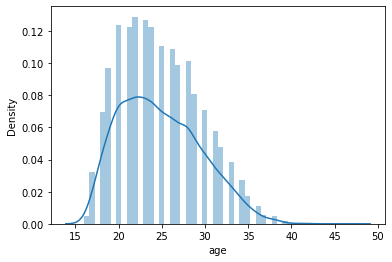

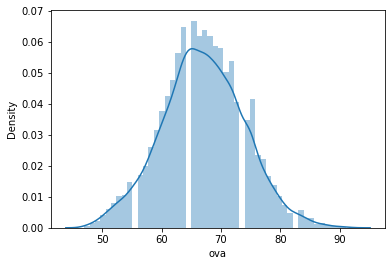

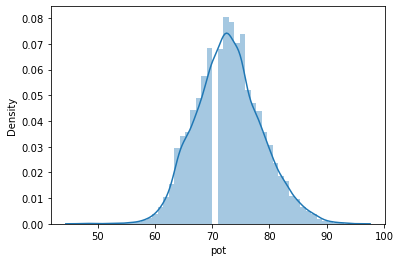

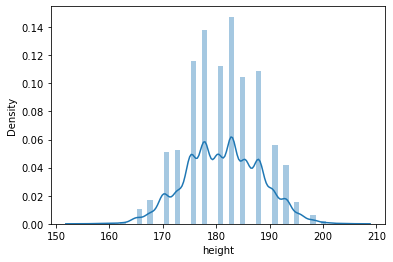

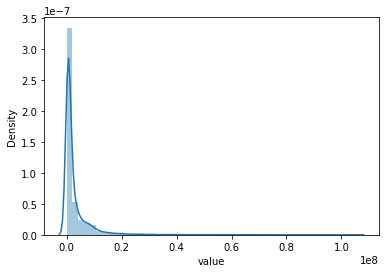

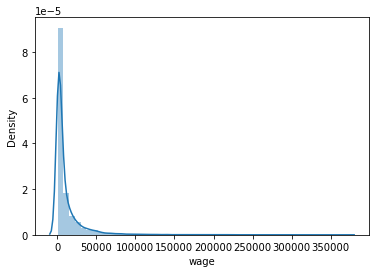

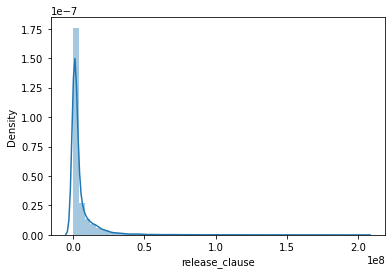

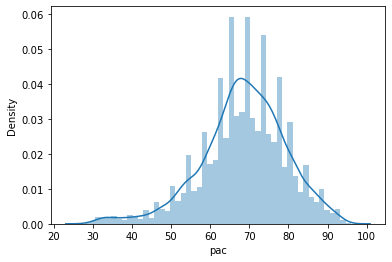

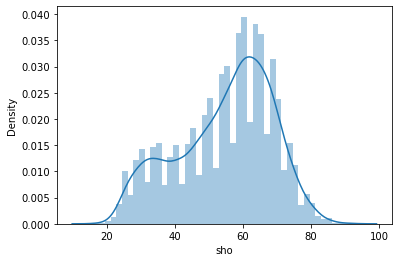

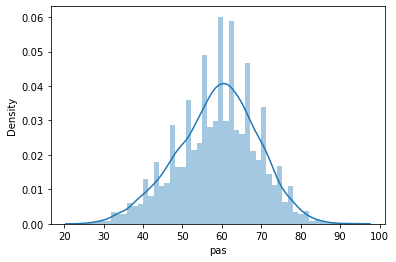

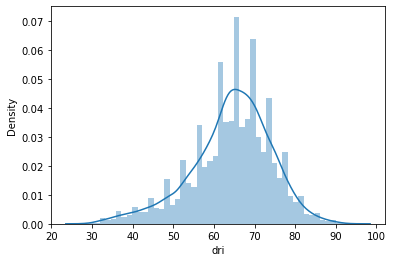

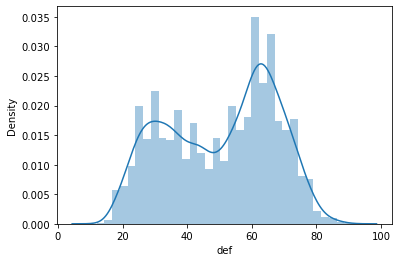

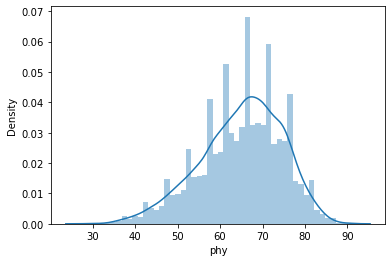

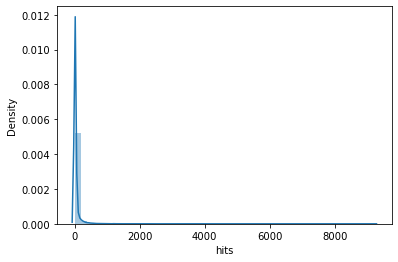

In [152]:
#plotting distribution plots
for column in dfd.select_dtypes(np.number).columns:
    sns.distplot(dfd[column])
    plt.show()

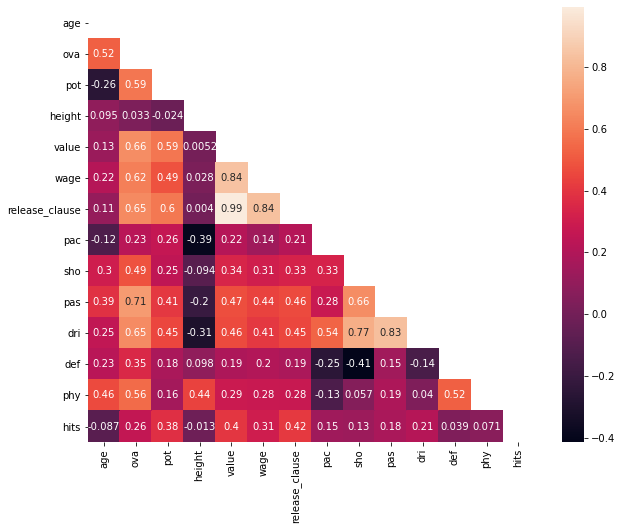

In [153]:
# check the correlations
mask = np.zeros_like(dfd.corr())

mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(dfd.corr(), mask=mask, annot=True)
plt.show()

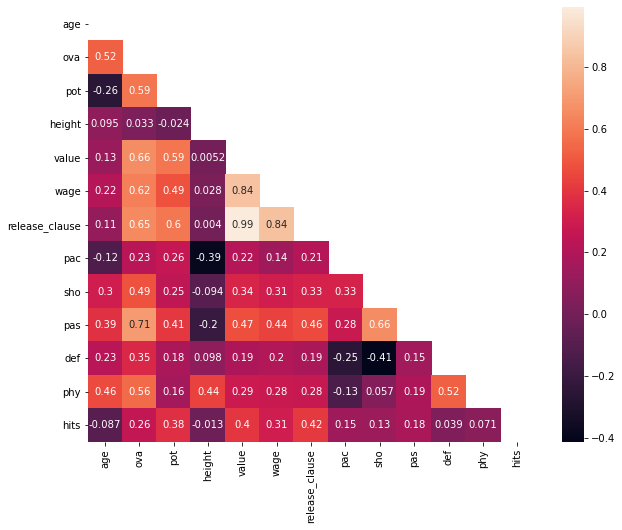

In [154]:
#let's drop columns which are highly correlated with each other and keep then keep the ones being most correlated to value
#dri and pas show a correlation of 0.83, I remove dri since pas is more correlated to value than dri
dfd = dfd.drop(['dri'], axis=1)
mask = np.zeros_like(dfd.corr())

mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(dfd.corr(), mask=mask, annot=True)
plt.show()

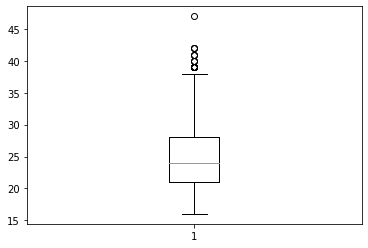

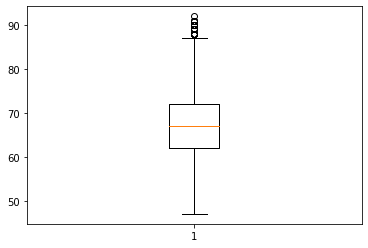

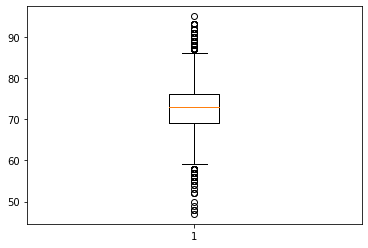

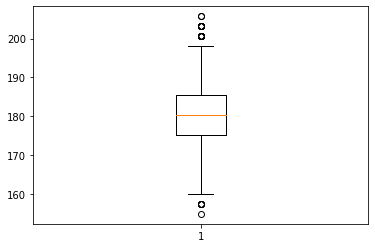

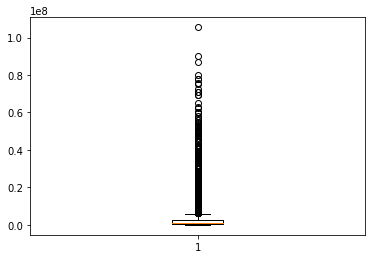

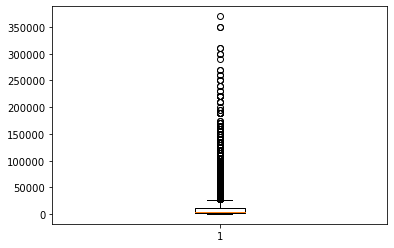

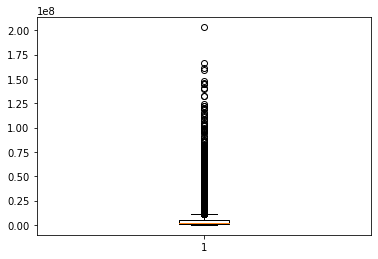

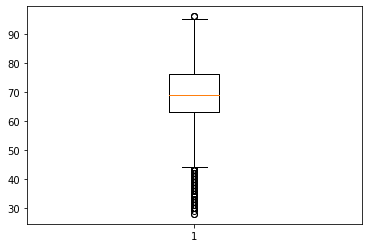

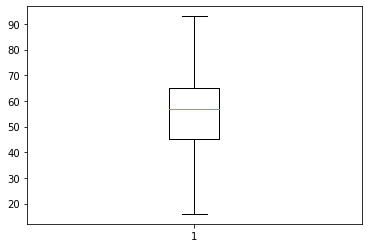

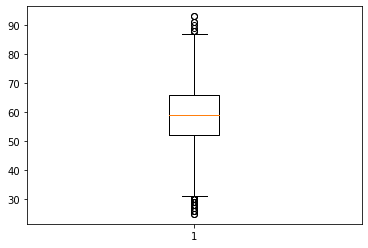

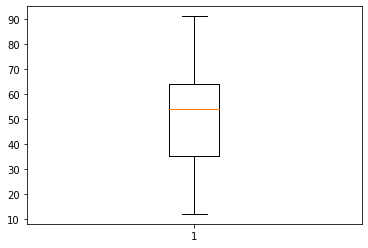

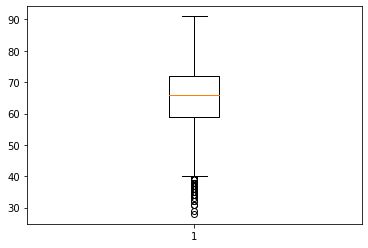

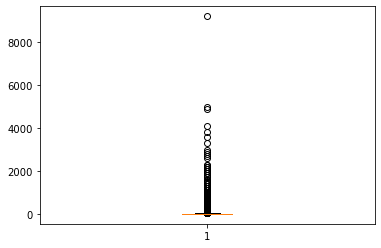

In [95]:
#plotting boxplots
for column in dfd.select_dtypes(np.number).columns:
    plt.boxplot(dfd[column])
    plt.show()

In [155]:
def remove_outliers(dfd, threshold=1.5, in_columns=dfd.select_dtypes(np.number).columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(dfd[column],75)
            lower = np.percentile(dfd[column],25)
            iqr = upper - lower
            upper_limit = upper + (threshold * iqr)
            lower_limit = lower - (threshold * iqr)
            dfd = dfd[(df[column]>lower_limit) & (dfd[column]<upper_limit)]
    return dfd

In [156]:
df_outliers=remove_outliers(dfd,threshold=2,skip_columns=['bp','contract_end']) #skipping the two columns because they are categorical
df_outliers

,age,ova,bp,pot,height,value,wage,release_clause,pac,sho,pas,def,phy,hits,contract_end
id,,,,,,,,,,,,,,,
330,35,80,CF,80,175.26,5500000.0,10000.0,0.0,68,82,75,31,69,10.0,2022
3281,36,72,CM,72,187.96,975000.0,6000.0,2000000.0,50,67,71,70,67,3.0,2021
3395,34,68,CAM,68,165.10,425000.0,6000.0,0.0,76,67,65,32,42,3.0,2023
3467,37,71,ST,71,185.42,850000.0,6000.0,1300000.0,66,74,59,35,69,9.0,2021
5471,38,78,CM,78,182.88,575000.0,8000.0,0.0,43,80,80,58,68,14.0,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259085,19,60,GK,72,185.42,300000.0,2000.0,570000.0,60,61,60,24,59,9.0,2022
259090,18,56,CAM,66,177.80,130000.0,3000.0,273000.0,62,46,57,43,55,5.0,2021
259091,18,56,RB,67,175.26,130000.0,2000.0,273000.0,63,35,44,54,55,3.0,2022


In [157]:
# encoding categorical

dfe = pd.get_dummies(df_outliers, drop_first=True) # i'm lazy
dfe

,age,ova,pot,height,value,wage,release_clause,pac,sho,pas,def,phy,hits,bp_CB,bp_CDM,bp_CF,bp_CM,bp_GK,bp_LB,bp_LM,bp_LW,bp_LWB,bp_RB,bp_RM,bp_RW,bp_RWB,bp_ST,contract_end_2022,contract_end_2023,contract_end_2024,contract_end_2025
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
330,35,80,80,175.26,5500000.0,10000.0,0.0,68,82,75,31,69,10.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3281,36,72,72,187.96,975000.0,6000.0,2000000.0,50,67,71,70,67,3.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3395,34,68,68,165.10,425000.0,6000.0,0.0,76,67,65,32,42,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3467,37,71,71,185.42,850000.0,6000.0,1300000.0,66,74,59,35,69,9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5471,38,78,78,182.88,575000.0,8000.0,0.0,43,80,80,58,68,14.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259085,19,60,72,185.42,300000.0,2000.0,570000.0,60,61,60,24,59,9.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
259090,18,56,66,177.80,130000.0,3000.0,273000.0,62,46,57,43,55,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
259091,18,56,67,175.26,130000.0,2000.0,273000.0,63,35,44,54,55,3.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [158]:
y = dfe['value']
X = dfe.drop(['value'], axis=1)

In [159]:
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = np.object)

In [160]:
dfe.columns

Index(['age', 'ova', 'pot', 'height', 'value', 'wage', 'release_clause', 'pac',
       'sho', 'pas', 'def', 'phy', 'hits', 'bp_CB', 'bp_CDM', 'bp_CF', 'bp_CM',
       'bp_GK', 'bp_LB', 'bp_LM', 'bp_LW', 'bp_LWB', 'bp_RB', 'bp_RM', 'bp_RW',
       'bp_RWB', 'bp_ST', 'contract_end_2022', 'contract_end_2023',
       'contract_end_2024', 'contract_end_2025'],
      dtype='object')

In [161]:
transformer = Normalizer()
transformer.fit(X_num)
x_normalized = transformer.transform(X_num)
pd.DataFrame(x_normalized)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,0.003499,0.007997,0.007997,0.017520,0.999662,0.000000,0.006798,0.008197,0.007497,0.003099,0.006898,0.001000,0.0,0.0,0.0001,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000e+00,0.000100,0.000000,0.000000,0.0
1,0.000018,0.000036,0.000036,0.000094,0.003000,0.999995,0.000025,0.000033,0.000035,0.000035,0.000033,0.000001,0.0,0.0,0.0000,4.999977e-07,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.0
2,0.005662,0.011325,0.011325,0.027496,0.999238,0.000000,0.012657,0.011158,0.010825,0.005329,0.006995,0.000500,0.0,0.0,0.0000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000e+00,0.000000,0.000167,0.000000,0.0
3,0.000028,0.000055,0.000055,0.000143,0.004615,0.999989,0.000051,0.000057,0.000045,0.000027,0.000053,0.000007,0.0,0.0,0.0000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,7.692226e-07,0.000000,0.000000,0.000000,0.0
4,0.004747,0.009745,0.009745,0.022848,0.999454,0.000000,0.005372,0.009995,0.009995,0.007246,0.008495,0.001749,0.0,0.0,0.0000,1.249318e-04,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000e+00,0.000000,0.000125,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8977,0.000033,0.000105,0.000126,0.000325,0.003509,0.999994,0.000105,0.000107,0.000105,0.000042,0.000104,0.000016,0.0,0.0,0.0000,0.000000e+00,0.000002,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000e+00,0.000002,0.000000,0.000000,0.0
8978,0.000066,0.000205,0.000242,0.000651,0.010988,0.999939,0.000227,0.000168,0.000209,0.000157,0.000201,0.000018,0.0,0.0,0.0000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.0
8979,0.000066,0.000205,0.000245,0.000642,0.007326,0.999973,0.000231,0.000128,0.000161,0.000198,0.000201,0.000011,0.0,0.0,0.0000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.000004,0.0,0.0,0.0,0.000000e+00,0.000004,0.000000,0.000000,0.0
8980,0.000026,0.000079,0.000093,0.000224,0.003827,0.999993,0.000091,0.000043,0.000074,0.000075,0.000069,0.000006,0.0,0.0,0.0000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.000001,0.0,0.0,0.0,0.000000e+00,0.000000,0.000001,0.000000,0.0


In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [163]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [164]:
predictions = model.predict(X_test)

In [165]:
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.9304171433209765, 114142.63287478745, 190413.77760218835)